In [110]:
import sys
import os
sys.path.insert(0,'../classes')
sys.path.insert(0,'../analysis')
import anl

sys.path.insert(0,'/home/zz737/projects/fiar/cog_model/fourinarow/Analysis notebooks/new')
hqfd = '/home/zz737/projects/fiar/cog_model/fourinarow/Analysis notebooks/new/Heuristic quality'
sys.path.insert(0,hqfd)
from fourinarowfunctions import *
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import logging
import numpy as np

import coloredlogs

from arena import Arena
from coach import Coach
from beck.beck_game import BeckGame as Game
from beck.beck_nnet import NNetWrapper as nn
from beck.beck_players import HumanBeckPlayer
from mcts import MCTS
from utils import *
log = logging.getLogger(__name__)

from keras import backend as K

# import tournament
# participant_iters = tournament.participant_iters

import load
import plot_fun
from importlib import reload
reload(load)

import value_analysis as va
import pandas as pd
import create_database as cd
import derived_metrics as dm
import tournament_new as tn

fig_save_dir = 'final_figures/'

In [15]:
# pick one model line, plot depth, depth ratio, entropy, bar and heat, value quality
dm.METRIC_RES_DIR
one_model_line_name = 'tournament_12;mcts100;cpuct2;id-res3-0'
metric_dir_one_model_line = os.path.join(dm.METRIC_RES_DIR,one_model_line_name)
df_all = []
for fn in os.listdir(metric_dir_one_model_line):
    if 'board' in fn:
        fn_ = fn.split('.')[0] # get rid of .p
        iter_str = fn_.split(';')[-1]
        if iter_str.isnumeric():
            iter = int(iter_str)
            df = pd.read_pickle(os.path.join(metric_dir_one_model_line,fn))
            df['iter'] = iter
            df_all.append(df)
df_all = pd.concat(df_all,axis=0,ignore_index=True)

In [51]:
depth_res_unstacked_depth = df_all.groupby(['bp','wp','iter']).median().unstack(level=-1)['depth']

entropy_res_unstacked_depth = df_all.groupby(['bp','wp','iter']).median().unstack(level=-1)['entropy']



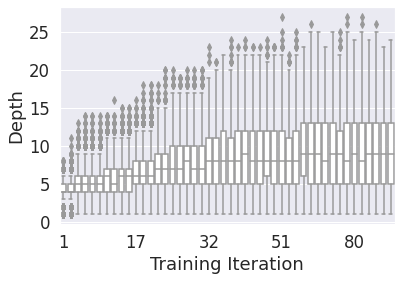

In [45]:
sns.set(font_scale = 1.5)
ax=sns.boxplot(x='iter',y='depth',data=df_all,color='white') 
import matplotlib.ticker as ticker
ax.set(xlabel='Training Iteration')
ax.set(ylabel='Depth')
ax.xaxis.set_major_locator(ticker.AutoLocator())
fig = ax.figure




In [106]:
# df_all.loc[(df_all['iter']==10)&(df_all['depth_ratio']==1)]

# bp = 27944620132
# wp = 5373485210
# np.array([int(s) for s in anl.decode_board(bp)]).reshape(4,9) - np.array([int(s) for s in anl.decode_board(wp)]).reshape(4,9)

,entropy,npieces,bp,wp,depth,depth_ratio,iter,Entropy/Npieces
72873,1.223088,22,27944620132,5373485210,14,1.0,10,0.055595
72874,1.153150,23,5373485210,28011728996,13,1.0,10,0.050137
72875,1.422223,24,28011728996,5407039642,12,1.0,10,0.059259
73082,0.547476,24,7539869720,26483896642,12,1.0,10,0.022811
73241,1.068846,24,6850366505,1671967252,12,1.0,10,0.044535
73708,1.858117,24,10105150496,6990373457,12,1.0,10,0.077422
73829,1.831552,24,22026434569,11862557750,12,1.0,10,0.076315
74171,1.363755,24,37908652580,4906342480,12,1.0,10,0.056823
74385,0.910841,24,9699903765,6535852106,12,1.0,10,0.037952
74445,0.625162,24,11329229832,56918878529,12,1.0,10,0.026048


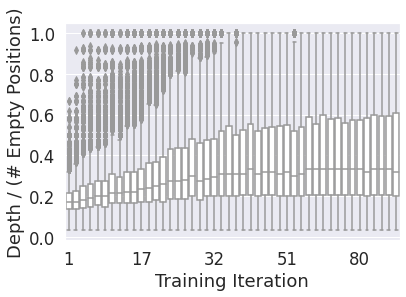

In [105]:
sns.set(font_scale = 1.5)
ax=sns.boxplot(x='iter',y='depth_ratio',data=df_all,color='white') 
import matplotlib.ticker as ticker
ax.set(xlabel='Training Iteration')
ax.set(ylabel='Depth / (# Empty Positions)')
ax.xaxis.set_major_locator(ticker.AutoLocator())
fig = ax.figure



<AxesSubplot:xlabel='iter', ylabel='bp-wp'>

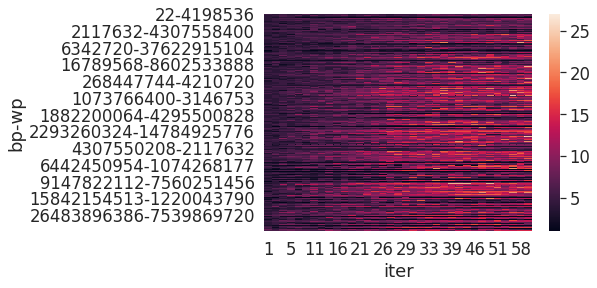

In [59]:
sns.heatmap(depth_res_unstacked_depth.loc[:,]) 

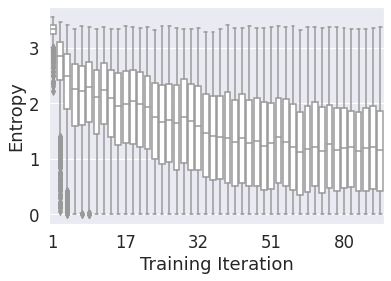

In [47]:
sns.set(font_scale = 1.5)
ax=sns.boxplot(x='iter',y='entropy',data=df_all,color='white') 
import matplotlib.ticker as ticker
ax.set(xlabel='Training Iteration')
ax.set(ylabel='Entropy')
ax.xaxis.set_major_locator(ticker.AutoLocator())
fig = ax.figure




In [77]:
corr_df = df_all.groupby(['npieces','wp','bp']).corr().loc[:,['entropy','depth','iter']]

In [81]:
corr_df.median(axis=0,level=(3))

,entropy,depth,iter
entropy,1.000000,-0.451722,-0.585778
depth,-0.451722,1.000000,0.565944
depth_ratio,-0.451722,1.000000,0.565944
iter,-0.585778,0.565944,1.000000
Entropy/Npieces,1.000000,-0.451722,-0.585778


In [98]:
depth_iter_corr = corr_df.swaplevel(0,3).loc['depth','iter']
depth_iter_corr = depth_iter_corr.to_frame().reset_index(level=2)

/ext3/miniconda3/envs/fourinarow/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


[Text(0.5, 0, 'Depth-Training Iteration Correlation')]

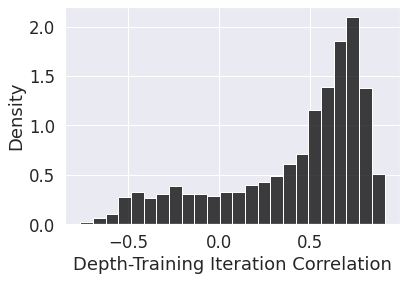

In [127]:
ax=sns.histplot(x='iter',data=depth_iter_corr,color='black',stat='density')
ax.set(xlabel='Depth-Training Iteration Correlation')

In [125]:
# percentage of boards with positive correlation
(depth_iter_corr['iter'] > 0).sum() / depth_iter_corr['iter'].shape[0]

0.8148377125193199

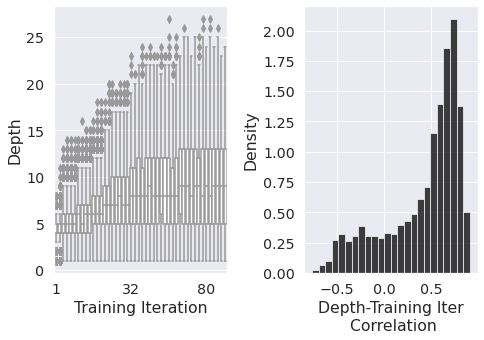

In [148]:
fig,axs = plt.subplots(1,2,figsize=(7,5))

sns.set(font_scale = 1.3)
axs[0]=sns.boxplot(x='iter',y='depth',data=df_all,color='white',ax=axs[0]) 
import matplotlib.ticker as ticker
axs[0].set(xlabel='Training Iteration')
axs[0].set(ylabel='Depth')
axs[0].xaxis.set_major_locator(ticker.AutoLocator())
# fig = ax.figure
axs[1]=sns.histplot(x='iter',data=depth_iter_corr,color='black',stat='density',ax=axs[1])
axs[1].set(xlabel='Depth-Training Iter\n Correlation')

plt.tight_layout()
# fig.savefig(os.path.join(fig_save_dir,'depth_fig.pdf'))


In [143]:
entropy_iter_corr = corr_df.swaplevel(0,3).loc['entropy','iter']
entropy_iter_corr = entropy_iter_corr.to_frame().reset_index(level=2)

/ext3/miniconda3/envs/fourinarow/lib/python3.7/site-packages/ipykernel_launcher.py:1: PerformanceWarning: indexing past lexsort depth may impact performance.
  """Entry point for launching an IPython kernel.


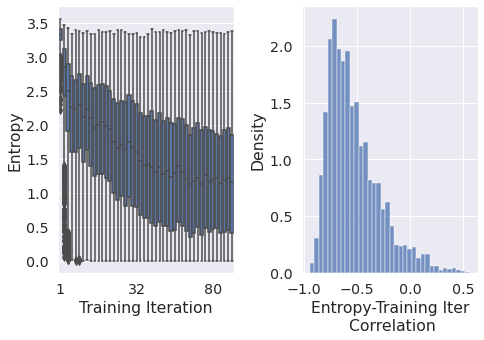

In [152]:
fig,axs = plt.subplots(1,2,figsize=(7,5))

sns.set(font_scale = 1.3)
axs[0]=sns.boxplot(x='iter',y='entropy',data=df_all,color='C0',ax=axs[0]) 
import matplotlib.ticker as ticker
axs[0].set(xlabel='Training Iteration')
axs[0].set(ylabel='Entropy')
axs[0].xaxis.set_major_locator(ticker.AutoLocator())
# fig = ax.figure
axs[1]=sns.histplot(x='iter',data=entropy_iter_corr,color='C0',stat='density',ax=axs[1])
axs[1].set(xlabel='Entropy-Training Iter\n Correlation')

plt.tight_layout()
fig.savefig(os.path.join(fig_save_dir,'entropy_fig.pdf'))



In [154]:
# percentage of boards with negative correlation
(entropy_iter_corr['iter'] < 0).sum() / entropy_iter_corr['iter'].shape[0]

0.9554868624420402